# Exploratory Data Analysis of Top Spotify Songs(2023) 

### > Importing Libraries

In [50]:
#syntax for accessing pandas library in python
import pandas as pd 
#syntax for accessing Matplotlib library
import matplotlib.pyplot as plt
#syntax for acccessing seaborn library
import seaborn as sns
#syntax for accessing numpy library
import numpy as np 

### > Loading Dataset

In [3]:
#loads in the dataset "spotify-2023.csv" 
#the syntax encoding ='latin' ensures that no form of "UnicodeDecodeError" occurs when loading a file that potentially contains characters invalid in UTF-8 (Pandas' Default encoding)
df = pd.read_csv('spotify-2023.csv', encoding='latin') 
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### > Examining Dataset

In [5]:
# Identifies the data type of the columns 
df_DT = df.dtypes
df_DT

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [52]:
# Creates a variable 'Incomplete_sets' which will store the sum of the rows with incomplete data
Incomplete_sets = pd.isnull(df).sum()
Incomplete_sets = Incomplete_sets[Incomplete_sets > 0] 

# Locates and stores the rows with duplicate track and artist name 
Duplicates = df.duplicated(['track_name', 'artist(s)_name']).sum() 

# Prints the number of columns with Incomplete Data and the Amount of Duplicate Tracks 
print("The Columns with Incomplete Data are:") 
print(Incomplete_sets)
print("The Amount of Tracks with a duplicate are:", Duplicates) 


The Columns with Incomplete Data are:
in_shazam_charts    50
key                 95
dtype: int64
The Amount of Tracks with a duplicate are: 4


In [54]:
# Identifies the rows with duplicates on the 'track_name' and 'artist(s)_name' column
# Keep = False makes it so that all duplicates and its original entries will be included
duplicate_rows = df[df.duplicated(['track_name', 'artist(s)_name'], keep=False)]

# Display the duplicate rows
duplicate_rows

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,NaN,Major,56,53,64,11,0,45,6
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,NaN,Major,56,52,64,11,0,45,7


# Data Cleaning by Removing Empty Sets

In [56]:
#Creates a variable named new_df which removes all rows with incomplete data
new_df = df.dropna(how='any', axis=0) 

#Reassigns the value with its duplicates at columns track_name and artist(s)_name removed
new_df = new_df.drop_duplicates(subset = ['track_name', 'artist(s)_name']) 

#Converts column 'stream' into numerical data type while turning garbage values into NaN simultaneously 
new_df['streams'] = pd.to_numeric(new_df['streams'], errors = 'coerce') 

#Converts data type of columns 'in_deezer_playlists', and 'in_shazam_charts' into numeric 
new_df['in_deezer_playlists'] = pd.to_numeric(new_df['in_deezer_playlists'], errors = 'coerce') 
new_df['in_shazam_charts'] = pd.to_numeric(new_df['in_shazam_charts'], errors = 'coerce') 

#Removes the rows with NaN values in the column "stream"
new_df = new_df.dropna(subset=['streams'])
new_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


# Basic Descriptive Statistics 

#### > Stats of Stream Column

In [58]:
#Converts the stream column to numeric in order to access the column without errors
#Uses .loc in order to avoid the "SettingWithCopyWarning", by only modifying the new_df instead of the original df

#Calculations for Statistics
average_streams = new_df['streams'].mean() #Calculates the mean of the stream column 
track_no = new_df['streams'].count() #Counts the number of tracks or rows 
track_std = new_df['streams'].std() #Calculates the standard deviation of stream column
track_median = new_df['streams'].median() #Calculates the median of the stream column
#Creating Dataframe in order to present the basic descriptive statistics of stream column neatly
table_m = pd.DataFrame({'Number of tracks': [track_no], 
                        'Average Streams': [average_streams], 
                        'Stream Std.': [track_std],
                        'Stream Median': [track_median]})

#Prints the Dataframe/Table                         
table_m

,Number of tracks,Average Streams,Stream Std.,Stream Median
0,813,4.689224e+08,5.239815e+08,263453310.0


#### > Distribution

#### Released Year of Track Distribution

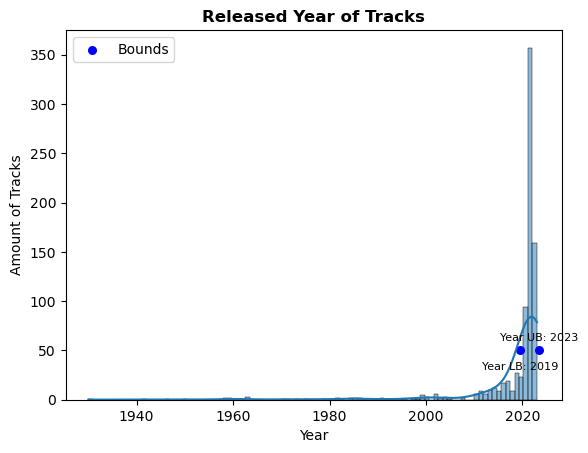

In [182]:
# To Identify what makes the outliers of the column 'released_year', we determine the Upper Boundary and Lower Boundary of that column
boundary_year = new_df['released_year'] 
AQ1 = boundary_year.quantile(0.25) 
AQ3 = boundary_year.quantile(0.75) 

# Find the InterQuartile Range to solve for UB and LB 
# Formulas for finding IQR, UB, and LB 
Year_IQR = AQ3 - AQ1 
Year_UB = AQ3 + (1.5)*Year_IQR 
Year_LB = AQ1 - (1.5)*Year_IQR 

# Plot a Histogram that shows the distribution on 'released_year' 
# Adds a displot on the histogram plotted (kernel density estimate being true) 
sns.histplot(data = new_df, x = 'released_year', bins = 100, kde = True) 
plt.title('Released Year of Tracks', fontweight = 'bold') 
plt.xlabel('Year') 
plt.ylabel('Amount of Tracks')
plt.show 

# Creates dots/scatter which will present the location of the UB and LB   
plt.scatter([Year_LB, Year_UB], [50, 50], color='blue', marker='o', s=30, label='Bounds')
plt.legend() 

# Annotating boundaries with different specifications (font size, alignment, color, and location) 
# X axis location for LB is LB itself while Y is at 30, X axis location for UB is UB itself while Y is at 60 
plt.text(Year_LB, 30, f'Year LB: {int(Year_LB)}', color='black', ha='center', fontsize=8)
plt.text(Year_UB, 60, f'Year UB: {int(Year_UB)}', color='black', ha='center', fontsize=8)
plt.legend()

# Prints the plot 
plt.show() 

#### Artist Count Distribution

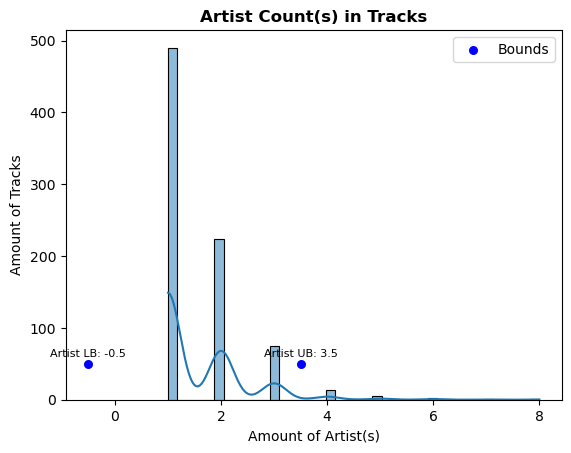

In [180]:
# Determine the Upper Boundary and Lower Boundary of Artist Count
boundary_artistcount = new_df['artist_count'] 
BQ1 = boundary_artistcount.quantile(0.25) 
BQ3 = boundary_artistcount.quantile(0.75) 

# Find the InterQuartile Range to solve for UB and LB 
# Formulas for finding IQR, UB, and LB 
Artist_IQR = BQ3 - BQ1 
Artist_UB = BQ3 + (1.5) * Artist_IQR  # Use Artist_IQR here
Artist_LB = BQ1 - (1.5) * Artist_IQR  # Use Artist_IQR here

# Plot a Histogram that shows the distribution on 'artist_count'
# Adds a displot on the histogram plotted (kernel density estimate being true) 
sns.histplot(data = new_df, x = 'artist_count', bins = 40, kde = True) 
plt.title('Artist Count(s) in Tracks', fontweight = 'bold') 
plt.xlabel('Amount of Artist(s)') 
plt.ylabel('Amount of Tracks')

# Creates dots/scatter which will present where the UB and LB is located  
plt.scatter([Artist_LB, Artist_UB], [50, 50], color='blue', marker='o', s=30, label='Bounds')
plt.legend() 

# Annotating boundaries with different specifications (font size, alignment, color, and location) 
# X axis location for LB is LB itself while Y is at 30, X axis location for UB is UB itself while Y is at 60 
plt.text(Artist_LB, 60, f'Artist LB: {Artist_LB:.1f}', color='black', ha='center', fontsize=8)  # Use Artist_LB
plt.text(Artist_UB, 60, f'Artist UB: {Artist_UB:.1f}', color='black', ha='center', fontsize=8)  # Use Artist_UB
plt.legend()

# Prints the Plot 
plt.show() 



# Top Performers

### > Top 5 Most Streamed Tracks

In [21]:
#Create variable x to store the top 5 tracks with the largest streams
x = new_df.nlargest(5, 'streams')

#Create Dataframe to present the top 5 most streamed tracks
table_streams = pd.DataFrame({'Artist(s)': x['artist(s)_name'], 'Track Name': x['track_name'], 'Streams': x['streams']})

#Prints the Dataframe 
table_streams

,Artist(s),Track Name,Streams
179,Ed Sheeran,Shape of You,3.562544e+09
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09
162,"Drake, WizKid, Kyla",One Dance,2.713922e+09
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2.665344e+09
140,Imagine Dragons,Believer,2.594040e+09


### > Top 5 Most Frequent Artists

In [23]:
# Create a variable "split" which will contain the splitted and expanded version of the column 'artist(s)_name'
# This will identify and expand the entries in the "artist(s)_name" column seperated by a comma "," in the dataset
splitted = new_df['artist(s)_name'].str.split(', ', expand = True) 

# This will stack the splitted and expanded artist into a single column  
stacked = splitted.stack() 

# Identify and store the values of the top 5 most frequent artist names appeared in "most_frequent" 
most_frequent = stacked.value_counts().nlargest(5) 

# Create DataFrame to present the artist names and the amount of times their tracks showed up in the dataset
# Index corresponds to the name of the artists while values corresponds to their number of tracks
table_frequency = pd.DataFrame({'Artist': most_frequent.index, 'No. of Tracks': most_frequent.values})

#Prints the DataFrame 
table_frequency 

,Artist,No. of Tracks
0,Bad Bunny,36
1,Taylor Swift,32
2,The Weeknd,26
3,Kendrick Lamar,23
4,Feid,21


# Temporal Trends

### > Released Per Year

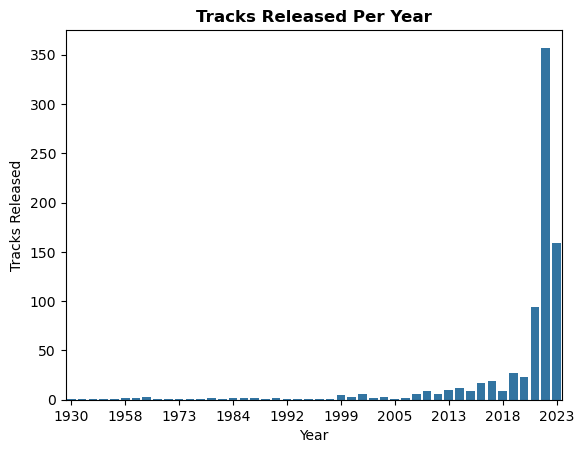

In [178]:
# Use the syntax groupby in order to Group the data by released_year and count the number of tracks
Yearly_Tracks = new_df.groupby('released_year').size().reset_index(name = 'track_count') 

# Creates a barplot using seaborn to represent the data 'Yearly_Tracks' 
sns.barplot(data = Yearly_Tracks, x = 'released_year', y = 'track_count') 
plt.title('Tracks Released Per Year', fontweight = 'bold') 
plt.xlabel('Year')
plt.ylabel('Tracks Released')

# Sets the ticks/increment of years to avoid crowding on the x axis 
# Sets the range from 0 (Initial or the Oldest Year released) to the latest with an increment of 5
# Applies Slicing to grab every 5th element within the range (E.g., 1930, 1935, 1940, 1945, 1950 --> 1930, 1950) 
# The Years shown in the barplot indicates the most notable years of releases (5 Years increment is only applied when tracks are actually released within that 5 year, meaning if no tracks are released like the years 1931-1957, it automatically jumps to 1958)
plt.xticks(ticks=range(0, len(Yearly_Tracks), 5), labels=Yearly_Tracks['released_year'][::5])

# Prints the Plot 
plt.show()

### > Released Per Month

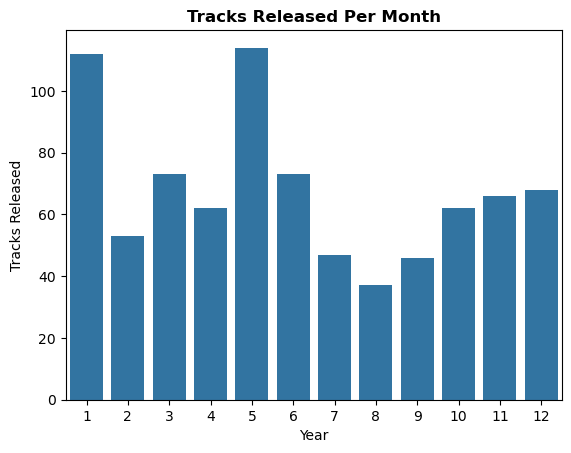

In [176]:
# Use the syntax groupby in order to Group the data by released_year and count the number of tracks
Monthly_Tracks = new_df.groupby('released_month').size().reset_index(name = 'track_count') 

# Creates a barplot using seaborn to represent the data 'Monthly_Tracks' 
sns.barplot(data = Monthly_Tracks, x = 'released_month', y = 'track_count') 
plt.title('Tracks Released Per Month', fontweight = 'bold') 
plt.xlabel('Year')
plt.ylabel('Tracks Released')

# Prints the Plot 
plt.show()

# Genre and Music Characteristics 

### > Correlation Between Streams and Musical Attributes

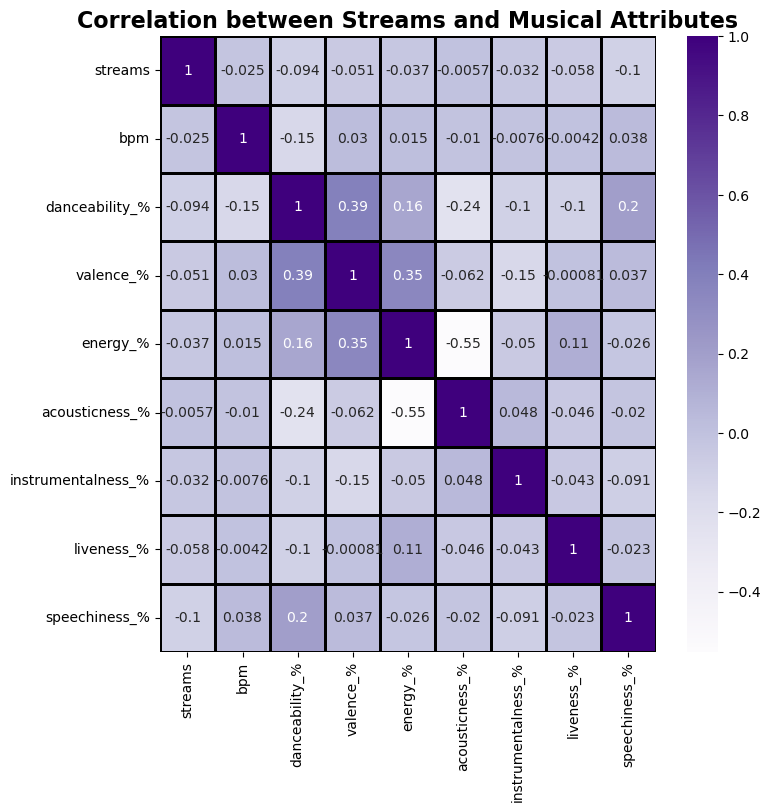

           Attributes  Correlation with Stream
0      acousticness_%                -0.005723
1                 bpm                -0.024852
2  instrumentalness_%                -0.032217
3            energy_%                -0.037014
4           valence_%                -0.051475
5          liveness_%                -0.057695
6      danceability_%                -0.093941
7       speechiness_%                -0.099997


In [204]:
# Creates a list of columns containing the correlated attributes and streams 
Correlated_Columns = ['streams', 'bpm', 'danceability_%', 
                      'valence_%', 'energy_%', 'acousticness_%', 
                      'instrumentalness_%', 'liveness_%', 'speechiness_%']  

# Filters out columns from new_df based only on the correlated columns 
Filtered_Correlation = new_df[Correlated_Columns] 

# Calculates the correlation of each columns 
Correlation_Stats = Filtered_Correlation.corr() 

# Plots a heatmap with custom settings for a more effective visualization 
plt.figure(figsize= (8, 8))
plt.title("Correlation between Streams and Musical Attributes", fontsize=16, fontweight = 'bold')
sns.heatmap(Correlation_Stats, annot = True, linewidth = 1, linecolor = 'black', cmap = 'Purples')
plt.show()

# Creates a variable attribute_values which will store the correlation statistics on descending order 
attribute_values = Correlation_Stats['streams'].drop('streams').sort_values(ascending=False)

# Creates a Dataframe that will present the correlation statistics 
Correlation_Table = pd.DataFrame({'Attributes': attribute_values.index, 
                        'Correlation with Stream': attribute_values.values})

# Prints the Heatmap + Table 
print(Correlation_Table)


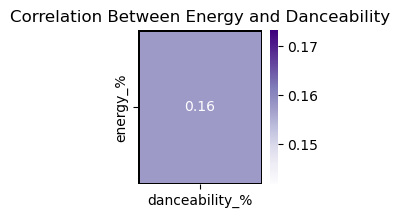

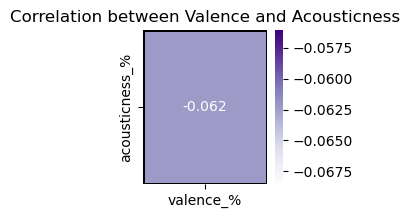

In [29]:
danceenergy_corr = Correlation_Stats.loc['danceability_%', 'energy_%']
valenceacoustic_corr = Correlation_Stats.loc['valence_%', 'acousticness_%']

# Create Dataframe that represents the correlation between dance and energy, and valence and acoustic
# Heatmaps won't accept 1 Dimensional arrays, therefore it is essential to turn it into a 2d by using Dataframe
corr1 = pd.DataFrame([[danceenergy_corr]], columns = ['danceability_%'], index = ['energy_%']) 
corr2 = pd.DataFrame([[valenceacoustic_corr]], columns = ['valence_%'], index = ['acousticness_%']) 

# Plots the heatmap that represents the correlation of Energy and Danceability 
plt.figure(figsize=(2, 2))
sns.heatmap(corr1, annot=True, linewidth=1, linecolor='black', cmap='Purples')
plt.title('Correlation Between Energy and Danceability')

#Prints Plot for Energy and Danceability
plt.show()

# Plot the heatmap that represents the correlation of valence and acousticness 
plt.figure(figsize=(2, 2))
sns.heatmap(corr2, annot=True, linewidth=1, linecolor='black', cmap='Purples')
plt.title('Correlation between Valence and Acousticness')

#Prints Plot for Valence and Acousticness 
plt.show()


# Platform Popularity 

### > Platform Percentage

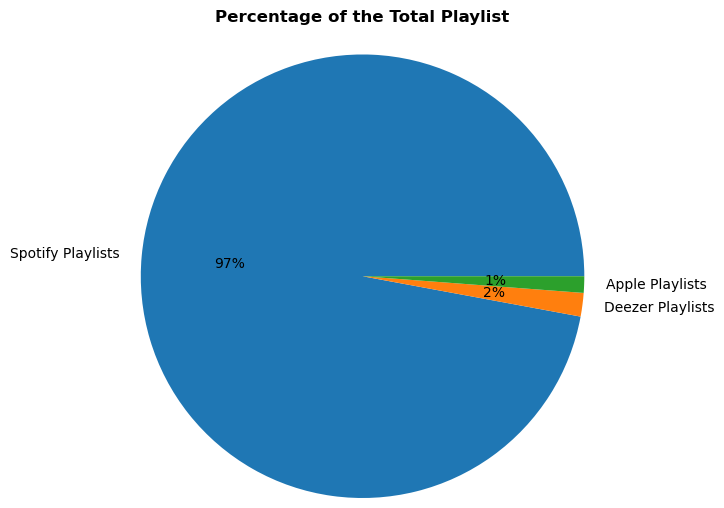

,Playlists,Count,Percentage (Exact)
0,Spotify Playlists,3943504.0,97.1%
1,Deezer Playlists,69618.0,1.7%
2,Apple Playlists,48719.0,1.2%
3,Total Playlists,4061841.0,100.0%


In [188]:
# Filters out the platform columns, applies summation, and stores it in their respective variables 
sum_spotplay = new_df['in_spotify_playlists'].sum() 
sum_deezerplay = new_df['in_deezer_playlists'].sum() 
sum_appleplay = new_df['in_apple_playlists'].sum() 

# Creates Label for each category in the piechart 
Labels = ['Spotify Playlists', 'Deezer Playlists', 'Apple Playlists'] 

# Stores the sum of playlists in each platform 
All_Sum = (sum_spotplay, sum_deezerplay, sum_appleplay) 

#Plots a Piechart that describes the percentage of the amount of playlist in the categories spotify, deezer and apple
plt.pie(All_Sum, labels = Labels, autopct ='%1.0f%%', radius = 1.5) 
plt.title("Percentage of the Total Playlist", fontweight = 'bold', pad = 50)
plt.show()

# Formula for calculating the percentage of each category 
Total_Sum = sum_spotplay + sum_deezerplay + sum_appleplay 
Percent_Spot = (sum_spotplay/Total_Sum)*100 
Percent_Deezer = (sum_deezerplay/Total_Sum)*100 
Percent_Apple = (sum_appleplay/Total_Sum)*100 
Percent_Total = (Total_Sum/Total_Sum)*100 

# Creates a dataframe that will show the categories and its count and percentage, which contributes to the overall pie chart
Playlist_Data = pd.DataFrame({
    'Playlists': ['Spotify Playlists', 'Deezer Playlists', 'Apple Playlists', 'Total Playlists'],
    'Count': [sum_spotplay, sum_deezerplay, sum_appleplay, Total_Sum],
    'Percentage (Exact)': [f"{Percent_Spot:.1f}%", f"{Percent_Deezer:.1f}%", f"{Percent_Apple:.1f}%", f"{Percent_Total:.1f}%"]})

#Prints the dataframe 
Playlist_Data

# Advanced Analysis

### > Key Streams

Text(0.5, 1.0, 'Keys of Streams')

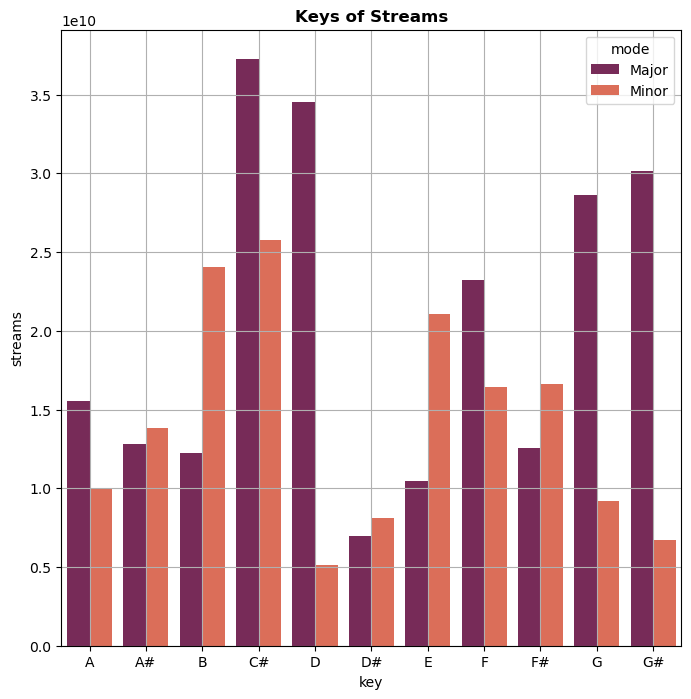

In [206]:
# Group by both 'key' and 'mode' and sum streams for each group
Total_Key = new_df.groupby(['key', 'mode'])['streams'].sum().reset_index()

# Figure Size of the Plot
plt.figure(figsize=(8, 8))

# Creates a Barplot that represents the data "Total_Key" 
sns.barplot(data=Total_Key, x='key', y='streams', hue = 'mode', palette ='rocket')

# Shows Gridlines
plt.grid()

# Creates a Title and Displays the Plot 
plt.title("Keys of Streams", fontweight = 'bold') 


### > Top 10 Artist Based on Chart Frequency

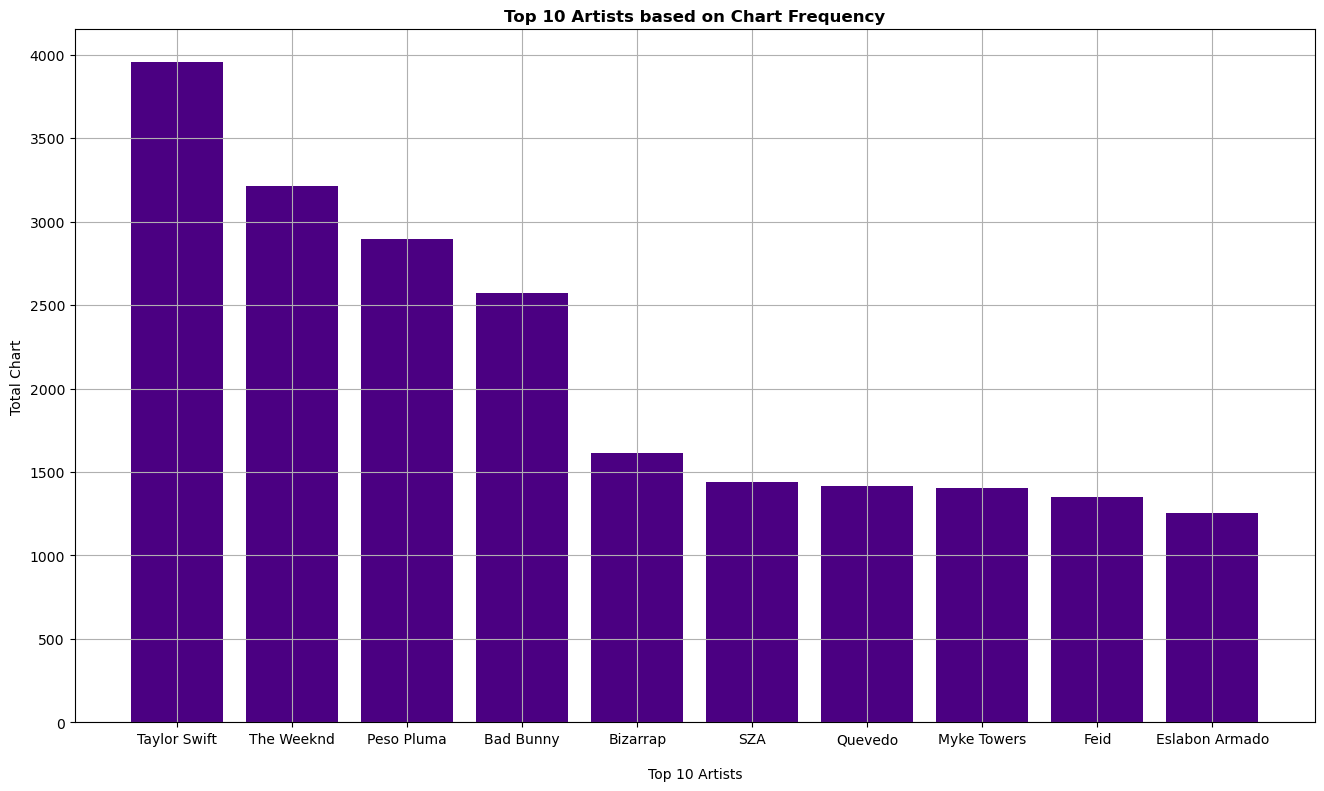

In [212]:
# Splits and expands the column 'artist(s)_name' by ', '
artist_split = new_df['artist(s)_name'].str.split(', ', expand=True)

# Stacks the splitted and expanded column into a singular column 
stacked_artists = artist_split.stack().reset_index(drop=True)

# Create variable "Charts_Data" which stores a copy of the clean dataframe in order to avoid having "SettingwithCopyWarning" Error 
# Ensures that it does not modify the original dataframe 
Charts_Data = new_df[['in_apple_charts', 'in_spotify_charts', 'in_deezer_charts', 'in_shazam_charts']].copy() 

# Adds a column 'Artist' which will be filled with the values of stacked_artists 
Charts_Data['Artists'] = stacked_artists 

# Group data by artists and sum the total chart appearance 
Artist_Charts = Charts_Data.groupby('Artists')[['in_apple_charts', 'in_spotify_charts', 'in_deezer_charts', 'in_shazam_charts']].sum() 

# Reset index to make it sequential again 
Artist_Charts = Artist_Charts.reset_index()

# Adds column 'Total Chart' which contains the summation of the artists' charts
Artist_Charts['Total Charts'] = Artist_Charts[['in_apple_charts', 'in_spotify_charts', 'in_deezer_charts', 'in_shazam_charts']].sum(axis=1)

# Sort the artists from highest amount to lowest amount 
# Resets index and removes old index 
Sorted_ArtistCharts = Artist_Charts.sort_values(by='Total Charts', ascending=False).reset_index(drop=True)

# Grabs only the top 10 Artists from the sorted chart 
Top10ArtistChart = Sorted_ArtistCharts.head(10)

# Plot the top 10 artists by their total chart appearances
# Set figuresize to 16 X 9 
plt.figure(figsize=(16, 9)) 
plt.bar(Top10ArtistChart['Artists'], Top10ArtistChart['Total Charts'], color='indigo')
plt.xlabel("Top 10 Artists", labelpad = 15)
plt.ylabel("Total Chart")
plt.title("Top 10 Artists based on Chart Frequency", fontweight = 'bold')
plt.grid()

#Prints the Plot 
plt.show()

### > Top 10 Artist Based on Total Playlist

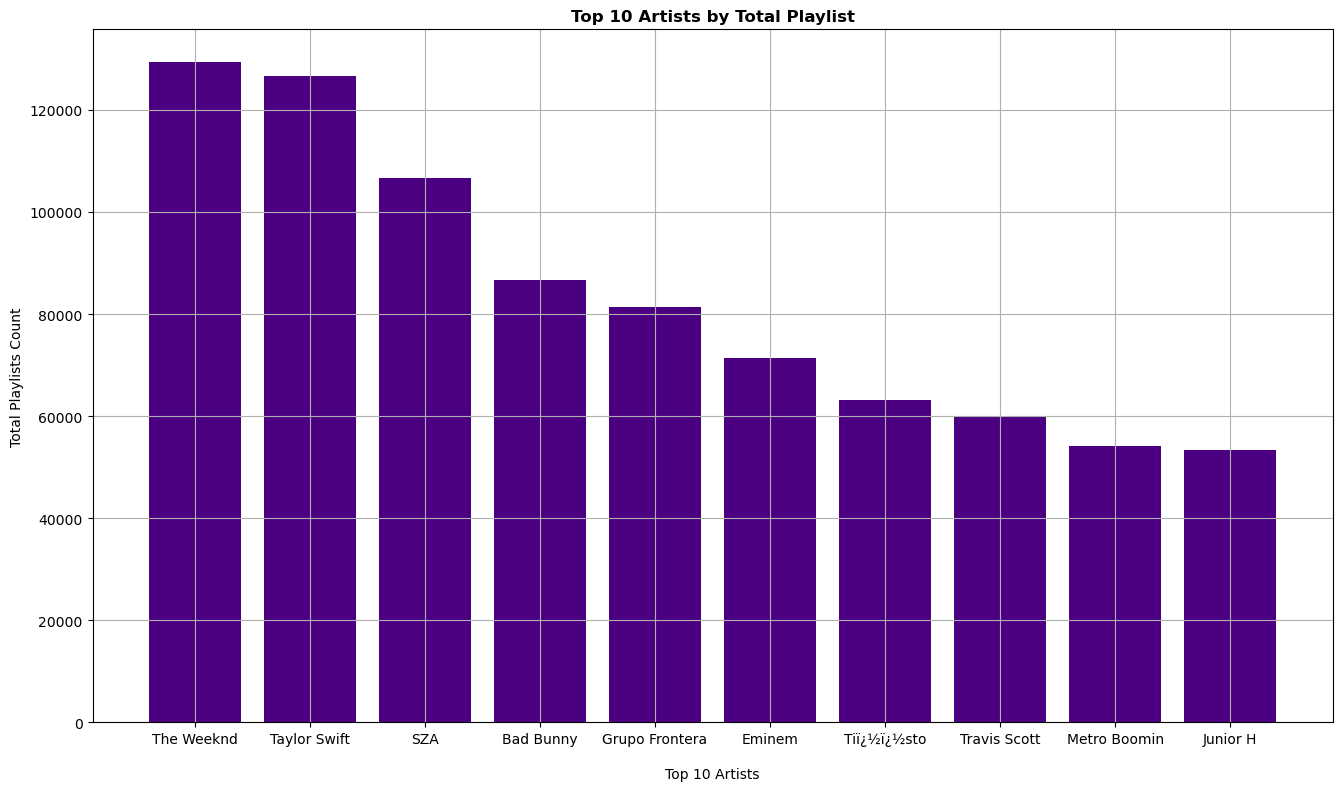

In [208]:
# Creates a copy of the clean dataframe to avoid modifying the original one (To ensure that no SettingwithCopyWarning takes place) 
Playlist_Data = new_df[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].copy()

# Reuse "stacked_artists" based on the previous codeblock 
Playlist_Data['Artists'] = stacked_artists 

# Group by artists and sum the total playlist appearances across all platforms
Artist_Playlists = Playlist_Data.groupby('Artists')[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].sum()

# Reset the index to make it sequential again
Artist_Playlists = Artist_Playlists.reset_index()

# Adds a column 'Total Playlists' which contains the summation of the artists' playlists
Artist_Playlists['Total Playlists'] = Artist_Playlists[['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists']].sum(axis=1)

# Sort the artists by their total playlist count in descending order
# Resets index and removes old index 
Sorted_ArtistPlaylists = Artist_Playlists.sort_values(by='Total Playlists', ascending=False).reset_index(drop=True)

# Grab only the top 10 artists from the sorted playlist data
Top10ArtistPlaylists = Sorted_ArtistPlaylists.head(10)

# Plot the top 10 artists by their total playlist appearances
# Figuresize is 16 X 9 
plt.figure(figsize=(16, 9))
plt.bar(Top10ArtistPlaylists['Artists'], Top10ArtistPlaylists['Total Playlists'], color='Indigo')
plt.xlabel("Top 10 Artists", labelpad = 15)
plt.ylabel("Total Playlists Count")
plt.title("Top 10 Artists by Total Playlist", fontweight = 'bold')
plt.grid()

#Prints the Plot
plt.show()